In [1]:
import sys
sys.path.insert(0, '../')

In [26]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import DataAnalysis
da = DataAnalysis.DataAnalysis

In [3]:
def inverse_func(x):
    return 1/x

In [6]:
distance_object = [38,   43,   48,   40,   56,   61,   70]
distance_image = [92.4, 80.5, 78.7, 84.2, 81.6, 84.8, 91.9]
d_o = list(map(lambda x: x-16, distance_object))
d_i = list(map(lambda tup: tup[1] - tup[0],  zip(distance_object, distance_image)))
h   = [3.7,  2.1,  1.5,  2.8,  1.0,  0.8,  0.6]
print(d_o, d_i)

[22, 27, 32, 24, 40, 45, 54] [54.400000000000006, 37.5, 30.700000000000003, 44.2, 25.599999999999994, 23.799999999999997, 21.900000000000006]


## Part A

In [8]:
x = list(map(inverse_func, d_o))
y = list(map(inverse_func, d_i))

print(f"Covariance: {da.covariance(x,y)}")
print(f"Correlation Coeff: {da.correlation_coefficients(x,y)}")

Covariance: -0.00010524863546487668
Correlation Coeff: -0.9997915728501874


## Part B

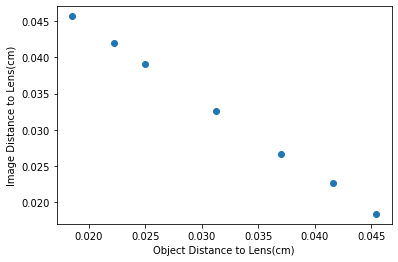

In [9]:
plt.xlabel("Object Distance to Lens(cm)")
plt.ylabel("Image Distance to Lens(cm)")
plt.scatter(x,y)

In [33]:
d_error = 1 #cm

In [34]:
def d_to_xy_error(d, alpha_d=d_error):
    """
    |derivative of 1/x| is 1/x^2 which means error is alpha_d/d^2
    """
    return alpha_d/d**2

y_error = list(map(d_to_xy_error, d_i))
x_error = list(map(d_to_xy_error, d_o))
# Since the partial y/partial x is -1, the quartrature of x and y can be directly taken
y_equiv_error = [da.quartrature_sum([x, y]) for x, y in zip(x_error, y_error)]

## Part C and E

In [35]:
def b_calc(w, x, y):
    w_sum = sum(w)
    numerator_sum = sum([w_val*(x_val+y_val) for w_val, x_val, y_val in zip(w, x, y)])
    return numerator_sum/w_sum

def b_error_calc(w, y_err):
    w_sum = sum(w)
    sumation = sum([(alpha_i*w_i/w_sum)**2 for alpha_i, w_i in zip(y_err, w)])
    return np.sqrt(sumation)

In [36]:
w = [1/a**2 for a in y_equiv_error]
b = b_calc(w,x,y)
b_error = b_error_calc(w, y_equiv_error)
f_error = b_error/(b**2)
print(f"b = {b} and f = {1/b}")
print(f"b_error = {b_error} and f_error = {f_error}")

b = 0.06399014911264757 and f = 15.627405372030166
b_error = 0.0006561790138567847 and f_error = 0.16024928193411897


## Part F

In [37]:
def division_error(x, y, x_err, y_err):
    """
    For z = x/y the error is:
    partial z/partial x (pzpx)= 1/y
    partial z/partial y (pzpy)= x/y^2
    sqrt((pzpx*x_err)**2 +(pzpy*y_err)**2)
    """
    pzpx = 1/y
    pzpy = x/y**2
    return np.sqrt((pzpx*x_err)**2 +(pzpy*y_err)**2)

In [50]:
h_i = [0.51, 0.89, 0.05]
h_o = [1.41, 0.68, 0.06]
caliper_error = .01
mag_error = [division_error(i, o, caliper_error, caliper_error) for i, o in zip(h_i,h_o)]
mag_final_error = np.mean(mag_error)/np.sqrt(len(mag_error)-1)
print(mag_error, mag_final_error)

[0.007541873547366713, 0.02422241872766983, 0.21695137988629598] 0.058622846124216144


In [51]:
distance_mag_error = division_error(25.65, 40, .5, .5)
print(distance_mag_error)

0.014849250625557676


In [52]:
da.quartrature_sum([distance_mag_error, mag_final_error])

0.060474278266417936

In [53]:
1/np.sqrt(2, for any additional observations, for any additional observations)

0.7071067811865475